# Dataset Analysis

In [3]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Load the train and test datasets
new_train_data = pd.read_csv("/kaggle/input/kuet-data-2/train.csv")
new_test_data = pd.read_csv("/kaggle/input/kuet-data-2/test.csv")

# Check basic structure of the datasets
print("Train Dataset Overview:\n")
print(new_train_data.info())
print("\nTest Dataset Overview:\n")
print(new_test_data.info())

# Display summary statistics for numerical columns
print("\nTrain Dataset Numerical Summary:\n", new_train_data.describe())
print("\nTest Dataset Numerical Summary:\n", new_test_data.describe())

# Display first few rows of the datasets
print("\nTrain Dataset Sample Rows:\n", new_train_data.head())
print("\nTest Dataset Sample Rows:\n", new_test_data.head())
    

Train Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7635 entries, 0 to 7634
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   address                              633 non-null    object 
 1   career_objective                     3794 non-null   object 
 2   skills                               7592 non-null   object 
 3   educational_institution_name         7574 non-null   object 
 4   degree_names                         7574 non-null   object 
 5   passing_years                        7574 non-null   object 
 6   educational_results                  7574 non-null   object 
 7   result_types                         7574 non-null   object 
 8   major_field_of_studies               7574 non-null   object 
 9   professional_company_names           7568 non-null   object 
 10  company_urls                         7568 non-null   object 
 11  start

## Missing Values Analysis

In [4]:

# Calculate missing value percentages
train_missing = new_train_data.isnull().mean() * 100
test_missing = new_test_data.isnull().mean() * 100

print("Train Dataset Missing Values (%):\n", train_missing[train_missing > 0].sort_values(ascending=False))
print("\nTest Dataset Missing Values (%):\n", test_missing[test_missing > 0].sort_values(ascending=False))
    

Train Dataset Missing Values (%):
 proficiency_levels                     92.547479
languages                              92.547479
address                                91.709234
expiry_dates                           79.214145
issue_dates                            79.214145
online_links                           79.214145
certification_skills                   79.214145
certification_providers                79.214145
role_positions                         64.217420
extra_curricular_organization_links    64.217420
extra_curricular_organization_names    64.217420
extra_curricular_activity_types        64.217420
career_objective                       50.307793
age_requirement                        42.750491
skills_required                        17.956778
experiencere_requirement               14.223969
positions                               0.877538
related_skils_in_job                    0.877538
end_dates                               0.877538
start_dates                       

## Unique Value Analysis

In [5]:

# Display unique values in each column
for col in new_train_data.columns:
    print(f"Column: {col}")
    print(f"Unique Values: {new_train_data[col].nunique()}")
    print("-" * 50)
    

Column: address
Unique Values: 28
--------------------------------------------------
Column: career_objective
Unique Values: 171
--------------------------------------------------
Column: skills
Unique Values: 340
--------------------------------------------------
Column: educational_institution_name
Unique Values: 328
--------------------------------------------------
Column: degree_names
Unique Values: 180
--------------------------------------------------
Column: passing_years
Unique Values: 149
--------------------------------------------------
Column: educational_results
Unique Values: 78
--------------------------------------------------
Column: result_types
Unique Values: 30
--------------------------------------------------
Column: major_field_of_studies
Unique Values: 210
--------------------------------------------------
Column: professional_company_names
Unique Values: 199
--------------------------------------------------
Column: company_urls
Unique Values: 16
-------------

## Data Visualization

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


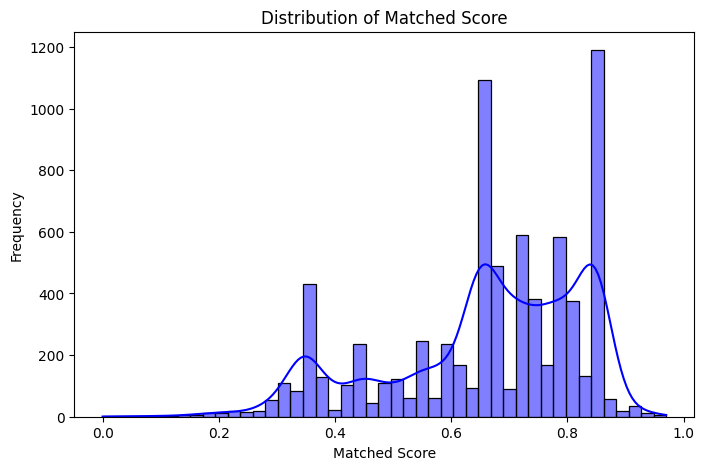

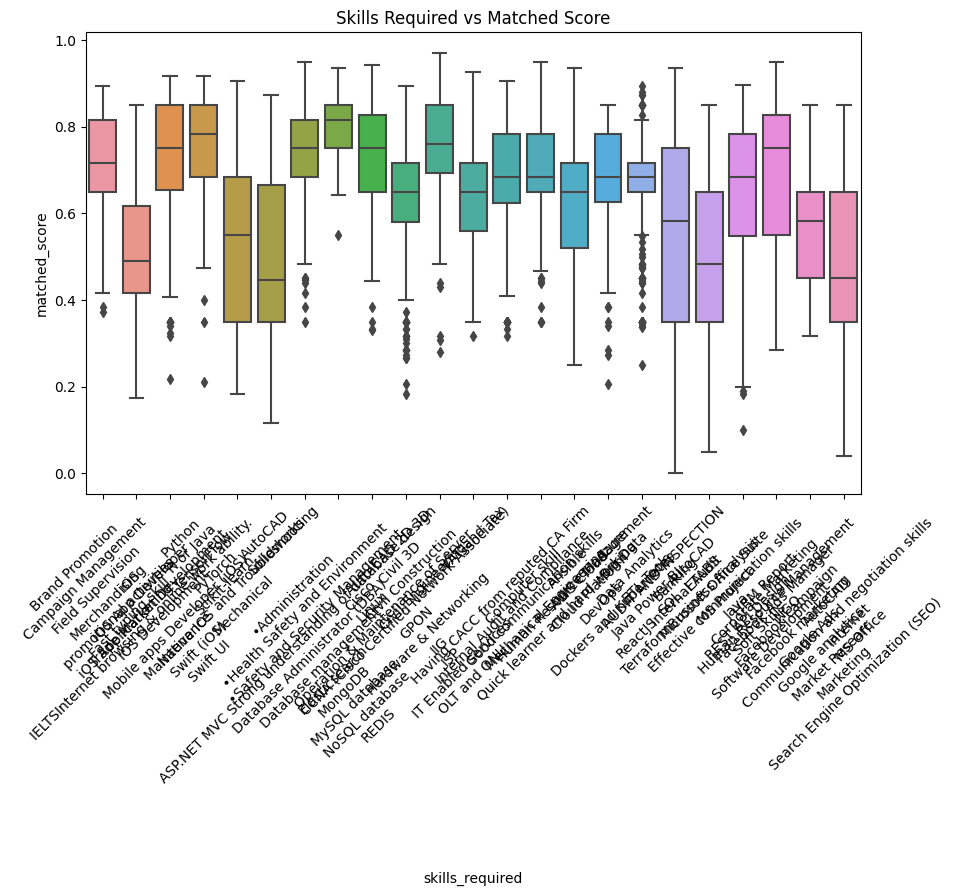

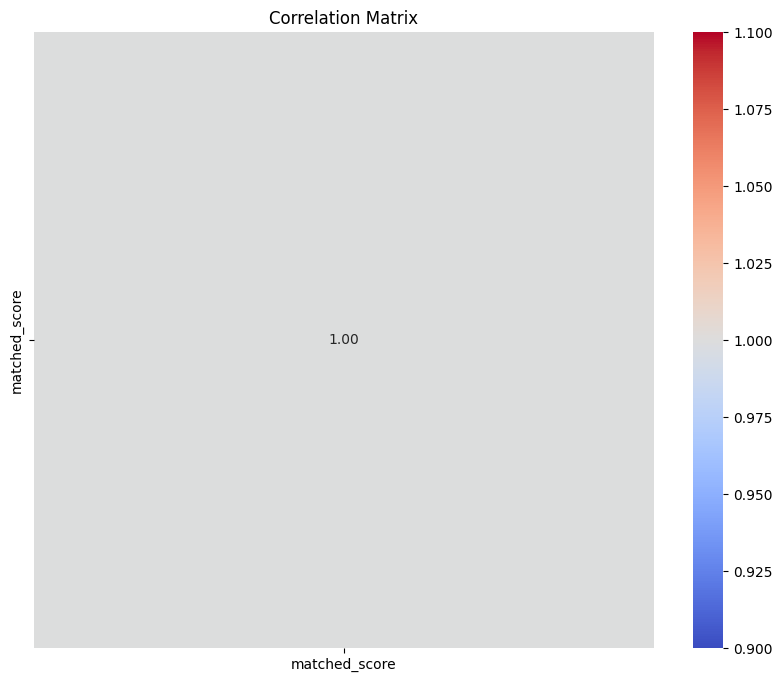

In [6]:

# Visualizing the target variable distribution
plt.figure(figsize=(8, 5))
sns.histplot(new_train_data['matched_score'], kde=True, color='blue')
plt.title('Distribution of Matched Score')
plt.xlabel('Matched Score')
plt.ylabel('Frequency')
plt.show()

# Analyzing the impact of skills_required on matched_score
plt.figure(figsize=(10, 6))
sns.boxplot(x='skills_required', y='matched_score', data=new_train_data)
plt.title('Skills Required vs Matched Score')
plt.xticks(rotation=45)
plt.show()

# Correlation matrix for numerical columns
numerical_cols = new_train_data.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = new_train_data[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
    

## Handle Missing Values

In [7]:

# Filling missing values with a placeholder or strategy
new_train_data.fillna("Unknown", inplace=True)
new_test_data.fillna("Unknown", inplace=True)

print("Missing values handled successfully.")
    

Missing values handled successfully.


## Encoding Categorical Features

In [8]:

# Encode categorical columns
categorical_cols = new_train_data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    new_train_data[col] = label_encoder.fit_transform(new_train_data[col])
    new_test_data[col] = label_encoder.transform(new_test_data[col])

print("Categorical columns encoded successfully.")
    

Categorical columns encoded successfully.


## Prepare Data for Modeling

In [9]:

# Drop columns not useful for modeling
X = new_train_data.drop(columns=['matched_score', 'address'])
y = new_train_data['matched_score']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and validation sets successfully.")
    

Data split into training and validation sets successfully.


## Feature Importance Using Random Forest

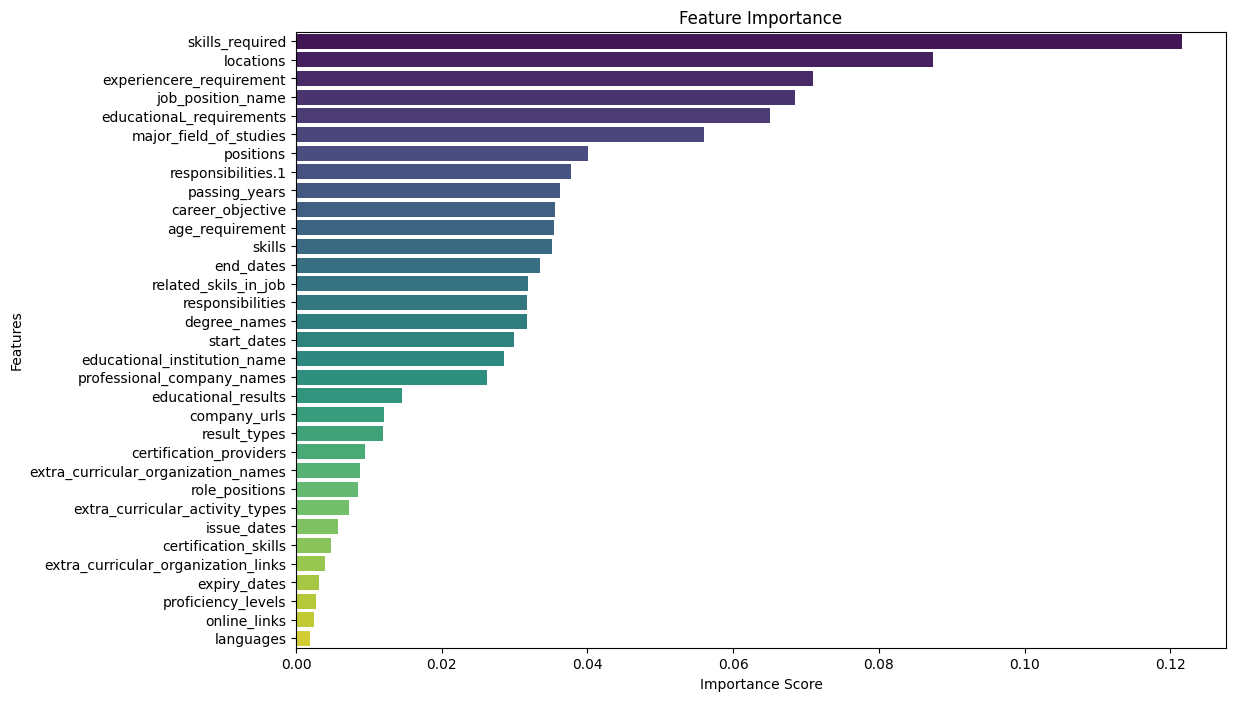

In [12]:

# Train Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Plot feature importance
importance = rf.feature_importances_
indices = np.argsort(importance)[::-1]
features = X_train.columns

plt.figure(figsize=(12, 8))
sns.barplot(x=importance[indices], y=features[indices], palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()
    

## Save Cleaned Data

In [14]:

# Save the processed data for reuse
new_train_data.to_csv("cleaned_train_data.csv", index=False)
new_test_data.to_csv("cleaned_test_data.csv", index=False)

print("Cleaned data saved successfully.")
    

Cleaned data saved successfully.


In [16]:
# Drop columns that were not used for training
X_test = new_test_data.drop(columns=['address'])  # Replace 'address' with irrelevant columns

# Ensure the columns in the test set match the training set
X_test = X_test[X_train.columns]


In [17]:
test_predictions = rf.predict(X_test)

In [22]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from lightgbm.callback import early_stopping

# Split the data
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create LightGBM datasets
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_val, y_val, reference=lgb_train)

# Define parameters
params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31
}

# Train LightGBM with the early stopping callback
model_lgb = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_val],
    callbacks=[early_stopping(stopping_rounds=10)]
)

# Evaluate on validation data
y_pred_val = model_lgb.predict(X_val, num_iteration=model_lgb.best_iteration)
mse_val = mean_squared_error(y_val, y_pred_val)
print(f"Validation MSE: {mse_val}")




[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3182
[LightGBM] [Info] Number of data points in the train set: 6108, number of used features: 33
[LightGBM] [Info] Start training from score 0.658422
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[98]	valid_0's l2: 0.0100886
Validation MSE: 0.010088640104460754


In [23]:
# Ensure test data columns match training data
X_test = new_test_data.drop(columns=['address'])  # Replace 'address' with irrelevant columns
X_test = X_test[X_train.columns]  # Ensure the same feature columns as the training set

# Predict on test data using the trained LightGBM model
test_predictions = model_lgb.predict(X_test, num_iteration=model_lgb.best_iteration)

# Prepare submission file
submission = pd.DataFrame({
    "ID": new_test_data["ID"],  # Replace "ID" with the unique identifier column in your test data
    "Predicted_Score": test_predictions
})

# Save submission file to CSV
submission.to_csv("submission_lightgbm.csv", index=False)
print("Submission file 'submission_lightgbm.csv' created successfully!")


Submission file 'submission_lightgbm.csv' created successfully!


In [19]:
# Prepare the submission file
submission = pd.DataFrame({
    "ID": new_test_data["ID"],  # Replace "ID" with the unique identifier column in your test data
    "Predicted_Score": test_predictions
})

# Save the predictions to a CSV file
submission.to_csv("submission.csv", index=False)
print("Submission file created successfully!")


Submission file created successfully!


In [ ]:
import lightgbm as lgb
from lightgbm.callback import early_stopping

# Train LightGBM
lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_val, y_val, reference=lgb_train)

params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31
}

# Train with early stopping callback
model_lgb = lgb.train(
    params,
    lgb_train,
    valid_sets=lgb_val,
    callbacks=[early_stopping(stopping_rounds=10)]
)

# Predict on validation set
y_pred_lgb = model_lgb.predict(X_val, num_iteration=model_lgb.best_iteration)
mse_lgb = mean_squared_error(y_val, y_pred_lgb)
print(f"LightGBM MSE: {mse_lgb}")